## Marketing Mix Simple model

### Scope of work

- Understand the relationship and the impact of the different communication channels to sales of the dataset Advertising.csv
- Analyse the correlation strength and statistic significance using correlation matrix and p-value of each channel to sales
- Build different regression models: Linear Regression, Ridge Regression, Lasso, Decision Tree, Random Forest
- Assess each model through the use of cross validation score
- Assess the magnitude of error of each model through the use of RMSE (Root Mean Squared Error)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We import the dataset Advertising.csv

df = pd.read_csv('Advertising (1).csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Dataset analysis to understand if there are null values or object values or deleting not useful columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
# Unnamed: 0 is not needed, it is sufficiente the default index of Pandas dataframe

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Now we have the features consisting of the 3 different media channels, we have to understand if there is any correlation within the data

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### We can represent better the correlation of the data with some scatter plots and heatmaps

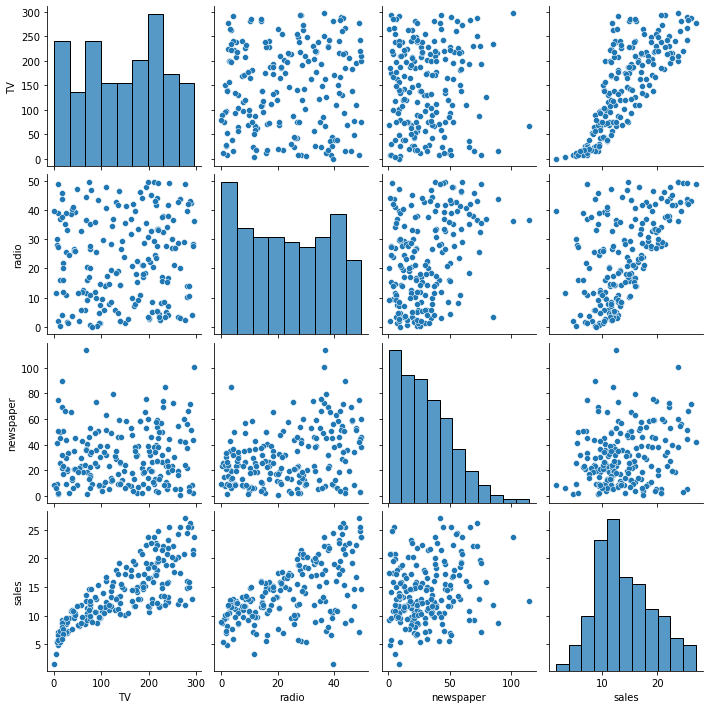

In [10]:
#use of pairplot from seaborn

sns.pairplot(df)

### More than evident that TV and radio are the channels that have a stronger correlation to sales than newspapers

<AxesSubplot:>

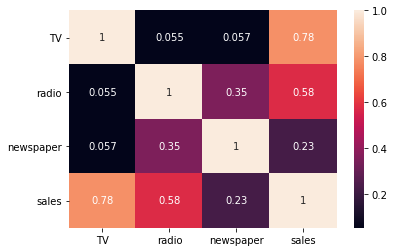

In [14]:
#let's visualize with a heatmap

corr = df.corr()
sns.heatmap(corr, annot=True)

In [16]:
#next steps: building some regression models, understanding strength of relationships through p-value

### Let's calculate the p-value to understand the statistical significance of each feature with the label

p-value: we set the threshold of statistical signifcance to p<= 0.05 to reject any null hypothesis

In [17]:
#import the scipy library to get the t-test and pvalue

from scipy.stats import ttest_ind

In [32]:
# pvalue of TV data and Sales Data

TV = df['TV'].values
Sales = df['sales'].values

result1 = ttest_ind(TV, Sales)
print(result1.pvalue)


3.287531216460733e-70


the result of pvalue for TV and Sales is negative so it is less than 0.05. This means that there is statistical significance between TV and sales data in terms of relationship, let's check now for radio and newspapers with sales

In [35]:
# pvalue of Radio data and Sales Data

radio = df['radio']
Sales = df['sales']

result2 = ttest_ind(radio, Sales)
print(result2.pvalue)



1.580156222732028e-15


the result of pvalue for radio and Sales is negative. This means that there is statistical significance (but less significant than the TV) between radio and sales data in terms of relationship, let's check now for print and newspapers with sales

In [36]:
# pvalue of Print data and Sales Data

newspapers = df['newspaper'].values
Sales = df['sales'].values

result3 = ttest_ind(newspapers, Sales)
print(result3.pvalue)

1.0345848819761895e-22


### Results:

<p>After finding the correlation and the pvalue of each feature, we can see that TV first, then radio and last newspapers have influence to sales. In terms of features importance, TV has the strongest correlation and statistical significance to sales growth. To build a regression machine learning model, we can consider all 3 features, although Tv and radio have higher importance than newspapers. </p>

### Building and testing best regression models

<p> We are going now to apply some regression models and measure their effectiveness to predict a marketing mix simple model

The regression models we are going to use and test are: 
    
    1)Linear Regression
    2)Ridge Regression
    3)Lasso Regression
    4)Decision Tree Regression
    5)Random Forest Regression

</p>

In [41]:
#we start to import scikit learn libraries for the models and for the training/test splits and the metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### We create the features and labels with X and y, then we build the different models

In [39]:
#we create the feature data X

X = df.iloc[:,0:3]
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [94]:
#we create the label data y

y = df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [42]:
# Building the different models:

linreg = LinearRegression()
rdg = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
tree = DecisionTreeRegressor(criterion='mse', splitter='random', max_depth=10)
rforest = RandomForestRegressor(n_estimators=120, criterion='mse')

### Testing Best model using cross validation score

<p> For each regression model we are going to assess the effectiveness using cross validation score. We are going to use 15 folds and then we calculate the mean to identify the best regression model performer. We also check the Root Mean Squared Error for the models to check the model with the lowest % of error.</p>

In [50]:
# Linear Regression assessment

cross_val_score(linreg, X, y, cv=15).mean()

0.8722434812544485

In [51]:
# Ridge Regression assessment

cross_val_score(rdg, X, y, cv=15).mean()

0.8722440402492564

In [52]:
# Lasso Regression assessment

cross_val_score(lasso, X, y, cv=15).mean()

0.8736015840511849

In [54]:
# Decision Tree Regression assessment

cross_val_score(tree, X, y, cv=15).mean()

0.9313028459690417

In [57]:
# Random Forest Regression assessment

cross_val_score(rforest, X, y, cv=15).mean()

0.9761733634655255

In [71]:
#we are going to get now the mean squared error of the random forest model

scores_rforest = cross_val_score(rforest, X, y, cv=15, scoring='neg_mean_squared_error')

mse_score_rforest = - scores_rforest

In [79]:
print('The MSE or Mean Squared Error of the Random Forest Model is:', mse_score_rforest.mean())

The MSE or Mean Squared Error of the Random Forest Model is: 0.5543150315425318


In [81]:
#the Root Mean Squared Error is:

rmse_random_forest = np.sqrt(mse_score_rforest.mean())
print('The RMSE or Root Mean Squared Error of the Random Forest Model is:', rmse_random_forest) 

The RMSE or Root Mean Squared Error of the Random Forest Model is: 0.7445233586278753


In [85]:
#the Root Mean Square Error of the Linear Regression model:

scores_linreg = cross_val_score(linreg, X, y, cv=15, scoring='neg_mean_squared_error')

mse_score_linreg = - scores_linreg.mean()
rmse_linreg = np.sqrt(mse_score_linreg.mean())
print('The RMSE or Root Mean Squared Error of the Linear Regression Model is:', rmse_linreg) 

The RMSE or Root Mean Squared Error of the Linear Regression Model is: 1.7268617387871026


In [86]:
#the Root Mean Square Error of the Ridge Regression model:

scores_ridge = cross_val_score(rdg, X, y, cv=15, scoring='neg_mean_squared_error')

mse_score_ridge = - scores_ridge.mean()
rmse_ridge = np.sqrt(mse_score_ridge.mean())
print('The RMSE or Root Mean Squared Error of the Ridge Regression Model is:', rmse_ridge)

The RMSE or Root Mean Squared Error of the Ridge Regression Model is: 1.7268600890757473


In [87]:
#the Root Mean Square Error of the Decision Tree Regression model:

scores_dtree = cross_val_score(tree, X, y, cv=15, scoring='neg_mean_squared_error')

mse_score_dectree = - scores_dtree.mean()
rmse_tree = np.sqrt(mse_score_dectree.mean())
print('The RMSE or Root Mean Squared Error of the Decision Tree Regression Model is:', rmse_tree)

The RMSE or Root Mean Squared Error of the Decision Tree Regression Model is: 1.1156141276264187


In [95]:
#the Root Mean Square Error of the Lasso Regression model:

scores_lasso = cross_val_score(lasso, X, y, cv=15, scoring='neg_mean_squared_error')

mse_score_lasso = - scores_lasso.mean()
rmse_lasso = np.sqrt(mse_score_lasso.mean())
print('The RMSE or Root Mean Squared Error of the Lasso Regression Model is:', rmse_lasso)

The RMSE or Root Mean Squared Error of the Lasso Regression Model is: 1.7205645313427425


### We got our best regression model that is the Random Forest with a score of 0.97 (or 97.6%) and a Root Mean Squared Error of 0.74

| Model       | Score       |
| ----------- | ----------- |
| Random F    | 0.97        |
| Decision T  | 0.93        |
| Lasso Reg   | 0.87        |
| Ridge Reg   | 0.87        |
| Linear Reg  | 0.87        |


 ### Now let's fit and predict the Random Forest Model

##### train and test split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
X_train.shape, X_test.shape

((160, 3), (40, 3))

### Now we fit and predict the Random Forest Model

In [64]:
rforest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=120)

In [92]:
y_pred = rforest.predict(X_test)

In [93]:
y_pred

array([12.19083333, 12.11333333,  8.1425    , 22.47333333, 24.19083333,
       10.31583333, 12.3825    , 13.08666667, 17.94166667,  7.29      ,
       14.48333333, 15.06416667, 10.00583333, 10.85083333, 18.58583333,
       12.7675    , 12.47916667, 10.89      , 13.41083333, 20.5575    ,
       11.8       ,  9.15      , 13.08666667,  8.60916667, 11.19916667,
       24.69083333, 19.65333333, 21.18166667,  4.7375    ,  5.1       ,
       15.62083333,  7.90833333, 15.44833333, 15.1075    , 19.07583333,
       19.16333333, 11.74666667, 15.00083333,  7.41333333, 12.21      ])